In [ ]:
!jt -t chesterish

In [ ]:
'''
To change the theme use the following command:
!jt -t <theme-name>

Theme names: 
1) chesterish 
2) onedork  (currently using)
    !jt -t onedork -f roboto -fs 12
3) monokai
 more here: https://github.com/dunovank/jupyter-themes
 
 
 other: https://towardsdatascience.com/bringing-the-best-out-of-jupyter-notebooks-for-data-science-f0871519ca29
'''

Now that we have gathered all the data, its time to clean and prepare them for our clustering algorithm

In [1]:
import pandas as pd
import progress_bar
import time
import collections
import stop_words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer

In [391]:
class EDA:
    def process_time(time_taken):
        message = "Process completed.\nTime taken: "
        if (time_taken >= 3600):
            print(message + "{hours}h {minutes}mins {seconds}secs".format(
                hours=(time_taken//3600), 
                minutes=((time_taken%3600)//60), 
                seconds=((time_taken%3600)%60)))
        elif (time_taken >= 60):
            print(message + "{minutes}mins {seconds}secs".format(
                minutes=(time_taken//60), 
                seconds=(time_taken%60)))
        else:
            print(message + "{seconds} seconds".format(seconds=time_taken))
    
    def display_outliers_boxplot(df, column_name):
        sns.boxplot(x=df[column_name])
    
    def display_outliers_skewness_value(df, column_name):
        '''Several machine learning algorithms make the assumption that the data 
        follow a normal (or Gaussian) distribution. This is easy to check with 
        the skewness value, which explains the extent to which the data is normally distributed. 
        Ideally, the skewness value should be between -1 and +1, and any major deviation from 
        this range indicates the presence of extreme values.
        Source: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers'''
        print(df[column_name].skew())

    def remove_outliers_by_iqr_score(df):
        '''Calculating the IQR Score in order to remove the outliers.'''
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        #print(IQR)
        df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
        #print(df_out.shape)
        return df_out
    
    def remove_outliers_by_range(df, column_name, greater_than_value, less_than_value):
        df = df[df[column_name] > greater_than_value]
        df = df[df[column_name] < less_than_value]
        return df
    
    def display_distribution(categories_count, plot_title, x_label, y_label):
        '''[Input] categories_count: type of int64 Series (1-dimension)'''
        plt.figure(figsize=(15, 10))
        plt.title(plot_title, fontsize=22)
        plt.xlabel(x_label, fontsize=18)
        plt.ylabel(y_label, fontsize=18)
        plt.xticks(rotation=90)
        sns.set(style="darkgrid")
        sns.barplot(categories_count.index, categories_count.values)
        plt.show()
        #plt.savefig("Category-articles.png")
    
    def display_buzzwords(text_values):
        '''[Input] text_values: Array of text elements separated by comma'''
        t1 = time.time() 
        
        long_string = ','.join(text_values)
        # Create a WordCloud object
        wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
        wordcloud = wordcloud.generate(long_string)
        #wordcloud.to_image()

        plt.figure( figsize=(20,10) )
        plt.imshow(wordcloud)

        t2 = time.time() 
        print("Process completed.\nTime taken:") 
        print("{:.2f}".format(round(t2-t1, 2))+" seconds.")
    
    def display_outliers(df):
        #to do
        # display a boxplot?
        return df

    def find_ngrams(input_list, n):
      return list(zip(*(input_list[i:] for i in range(n))))

    def find_most_common_n_grams(articles_split_by_word, n):
        occurrences = {}

        for item in articles_split_by_word: 
            ngrams_per_article = collections.Counter(EDA.find_ngrams(item, n))

            items_list = list(ngrams_per_article.most_common(1))
            words_list = [] 

            for item in items_list[0][0]:
              words_list.append(item)

            words = ' '.join(map(str, words_list)) 
            #occurrences_within_article = list_of_dict_values[0][1]

            if words in occurrences:
                occurrences[words] +=1
            else:
                occurrences[words] = 1
        return occurrences
    
    def count_words_per_records_opt_1(df):
        return df['Text'].str.split().str.len()
    
    def count_words_per_records_opt_2(df):
        return df.Text.apply(lambda x: len(str(x).split()))

    def difference_percentage(num_A, num_B):
        "Differences between two numbers as a percentage with two digits e.g. 45.38%"
        if (num_A >= num_B):
            temp = ((num_B-num_A)/num_A) * 100
            temp = round(temp, 2) #keep only two digits after decimal
        else:
            temp = ((num_A-num_B)/num_B) * 100
            temp = round(temp, 2) #keep only two digits after decimal
        return temp
    
    def count_records_per_label(df, new_column_name):
        "count the number of records for each category and store them in a new column"
        return df.groupby(['Category'], sort=False).size().reset_index(name=new_column_name)


class NLP:
    """NLP functions that were used"""
        
    def tokenization(df):
        #return df['Text'].map(lambda x: x.split(" "))
        return df['Text'].map(lambda x: x.split(" "))
    
    def rejoin_words(row):
        my_list = row
        joined_words = ( " ".join(my_list))
        return joined_words
    
    def lemmatize(df):
        # to do
        return df
    
    #FIX THIS FUNCTION
    def stemming(articles_split_by_word):
        articles_split_by_word = articles_split_by_word.apply(lambda words: [PorterStemmer().stem(w) for w in words])
        return articles_split_by_word
    
    def remove_stop_words(row):
        english_Stop_Words = stop_words.get_stop_words('en')
        my_list = row
        meaningful_words = [w for w in my_list if not w in english_Stop_Words]
        return (meaningful_words)
    
    def remove_splitted_words(row):
        # remove(or split) RainyDay, PlayingInTheCold
        #regex: [A-Z][a-z]*[A-Z][a-z]*
        #TODO: ?
        return 
    
    def remove_rare_words(df):
        # see here https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
        #TODO: ?
        return df
    
    
    def to_lower_case(df, column_name):
        return df[column_name].str.lower()
    


class Cleaner:
    """Cleaning functions that were used"""
    
    def concatenate_dataframes():
        frames = [df1, df2, df3]
        result = pd.concat(frames)
        return result
    
    def drop_null_values(df):
        df.dropna(subset=['Title', 'Text'], inplace=True)
        return df
    
    def drop_duplicate_values(df):
        df.drop_duplicates(subset=['Title', 'Text'],keep=False, inplace=True) 
        return df
    
    def remove_new_line(df):
        df.Text.replace('\n',' ', regex=True, inplace=True)
        return df
    
    def remove_multiple_spaces(df):
        df.Text.replace('\s+', ' ', regex=True, inplace=True)
        return df
    
    def remove_non_ascii_chars(df):
        df.Text.replace(r'[^\x00-\x7F]',' ', regex=True, inplace=True) 
        return df
    
    def remove_most_noisy_words(df, file_name):
        '''Remove predefined noisy words. These words have been detected with n-grams'''
        noisy_file = open(file_name, 'r') 
        all_lines = noisy_file.readlines() 
        lst = []

        for line in all_lines: 
            #lst.append(line.strip())
            string_to_replace = line.strip()
            df.Text.replace(string_to_replace,' ', regex=True, inplace=True)
            df.Text.replace(r'\( source.*\)',' ', regex=True, inplace=True)
            df.Text.replace(r'\{(.*?)}',' ', regex=True, inplace=True)
        noisy_file.close()
        #df.Text.replace({w: " " for w in lst}, regex=True, inplace=True)
        return df
        # to do - THIS ONE GOES TO ANOTHER CLASSS?
        # source : university || source : something   | \( source.*\)
        # {* registration_firstname *}  | \{(.*?)}
        # article extract not available.
        # ads with photos only
        # thank you for registering
        # tip : use comma'
        # need an account? create one now.
        # connect tweet linkedin comment email more
        # @telefootball
        # license photo
        # october, 2015 || oct. 21, 2015 || sept. || september
        # you have successfully emailed the post.
        # photo:
        # updated:, 10:17, a.m., friday,, oct., 2,, 2015, |, 
        # posted:, 10:16, a.m., friday,, oct., 2,, 2015,
            
    def remove_single_chars(df):
        #remove chars that are single such as "s"/. 
        #If you replace the apostrophe "That's" then it's left "That s
        
        # maybe make it also to remove 2-chars? no many meaningful words exist see here: https://www.lexico.com/explore/two-letter-words
        # if also for 2-chars use this: \s(([a-z]{1})|([a-z]{2}))\b
        df.Text.replace(r'\s[a-z]{1}\b',' ', regex=True, inplace=True) 
        return df
    
    def remove_links(df):
        df.Text.replace(r'(https?:\/\/)?(www\.)?[a-z0-9-]+\.(com|org|net|uk)(\.[a-z]{2,3})?',' ', regex=True, inplace=True) 
        return df
    
    def remove_dates(df):
        #removes 22/09/2018, 01.04.2011, 18-12-2000 
        df.Text.replace(r'(0?[1-9]|[12][0-9]|3[01])[\/\-\.](0?[1-9]|1[012])[\/\-\.]\d{4}',' ', regex=True, inplace=True) 
        return df
    
    def remove_years(df):
        # TODO: IMPROVE THIS? MATCHES 2019. 1877, 1382 etc.
        df.Text.replace(r'[1-2][0-9]\d{2}',' ', regex=True, inplace=True) 
        return df
    
    def remove_months(df):
        df.Text.replace(r'(jan(uary)?|feb(ruary)?|mar(ch)?|apr(il)?|may|jun(e)?|jul(y)?|aug(ust)?|sept(ember)?|oct(ober)?|nov(ember)?|dec(ember)?)',' ', regex=True, inplace=True)         
        return df
        
    def remove_days(df):
        # TODO: IMPORVE THE FOLLOWING
        # removes also sat which can be a verb and sun
        df.Text.replace(r'((mon|tues|wed(nes)?|thur(s)?|fri|sat(ur)?|sun)(day)?)',' ', regex=True, inplace=True) 
        return df
    
    def remove_time(df):
        #removes 09:11 PM - doesn't remove 23:38 because there is no PM nor AM
        df.Text.replace(r'\b((1[0-2]|0?[1-9]):([0-5][0-9]) *([AaPp]*.[Mm]*.))',' ', regex=True, inplace=True) 
        #removes 23:38 format
        df.Text.replace(r'\b([0-1]([0-9])|([2])([0-3])):([0-5][0-9])',' ', regex=True, inplace=True)         
        return df
    
    def remove_punctuation(df):
        # removes all punctuations but NOT: dots (.), minus (-), and percentages (5) e.g. -2.48 % 
        # We might want to keep those because of the financial and world categories
        df.Text.replace(r'[^\w\d\%\.\-\s]+|[_]',' ', regex=True, inplace=True)         
        return df
    
    def remove_numbers(df):
        # to do? / check remove_years() first
        return df
    


In [4]:
#df_all_news = pd.read_excel("data\\original_data\\all_news.xlsx")
#df_all_news.drop(['Unnamed: 0'], axis=1, inplace=True) #drop the unecessary columns

df_all_news = pd.read_pickle(r'data/original_data/pickles/all_news')
initial_size = len(df_all_news)#store the number of records. Will be used for statistics

In [260]:
df_all_news

,Title,Text,Category
1,Tracy Morgan performs first stand-up show sinc...,Tracy Morgan performs first stand-up show sinc...,entertainment
3,President Barack Obama interviews author Maril...,FCC Information President Barack Obama intervi...,entertainment
4,"I will perform at night clubs, shows β€“ Pasto...",Source: Ghana | Hitz FM | Euphemia Akpalu Date...,entertainment
7,MEG Records' Country Star Tom MacLear will be ...,"MEG Records : In Latest Music News , Tom MacLe...",entertainment
8,Defeat the Zombie Apocalypse,Defeat the Zombie Apocalypse Zombie hunting in...,entertainment
...,...,...,...
60292,Bidenβ€™s Indecision Fuels Doubts He Could Sti...,Vice President Joe Bidenβ€™s summer of uncerta...,world
60293,AFL grand final 2015: Hawthorn drop Billy Hart...,Return to video Video settings Please Log in t...,world
60294,Joaquin lashes Bahamas; Powerful hurricane cou...,"Photo: Tim Aylen, AP Image 1 of / 5 Caption\nC...",world
60295,5 US service members among 12 dead in Afghan p...,5 US service members among 12 dead in Afghan p...,world


# Exploring the dataset

In [352]:
import plotly.express as px

#count the number of records for each category and store it in a new dataframe
df_process_stats = EDA.count_records_per_label(df_all_news, "Count_Pre_Processing")

fig = {
  "data": [
    {
      "values": df_process_stats['Count_Pre_Processing'],
      "labels": df_process_stats['Category'],
      "textposition": "outside",
      "domain": {"x": [0, .77]},
      "name": "Criticality",
      "marker": {'colors': px.colors.cyclical.Twilight
                },
      "textinfo":"percent+label",
      "textfont": {'color': '#000000', 'size': 15},
      "hole": .5,
      "type": "pie",
      "automargin": False 
    } ],
    "layout": {
        "title":"Dataset Distribution",
        "annotations": [
            {
                "font": {
                    "size": 25,
                    "color": '#000000'
                },
                "showarrow": False,
                "text": "News",
                "x": 0.31,
                "y": 0.5
            }
        ]
    }
}

iplot(fig)

#### Lets remove the empty and duplicated records 

In [6]:
df_all_news = Cleaner.drop_null_values(df_all_news)
df_all_news = Cleaner.drop_duplicate_values(df_all_news)

df_process_stats['Count_Post_Processing'] = EDA.count_records_per_label(df_all_news, "Count_Post_Processing")['Count_Post_Processing']

df_process_stats

,Category,Count_Pre_Processing,Count_Post_Processing
0,entertainment,50282,34150
1,financial,47851,44036
2,political,87157,37076
3,sport,156899,81799
4,technology,41476,37812
5,travel,49470,46521
6,world,60297,56489


In [45]:
lossPercentage = []
for index, row in df_process_stats.iterrows():
    temp = EDA.difference_percentage(row['Count_Pre_Processing'], row['Count_Post_Processing'])
    lossPercentage.append(str(temp)+"%")
    
df_process_stats['Records_Loss']=lossPercentage

#TO IMPROVE THIS MAYBE MAKE SOME VISUALISATIONS?
total_loss = round((((len(df_all_news)-initial_size)/initial_size)*100), 2)
print("Total records pre-processing: " + str(df_process_stats['Count_Pre_Processing'].sum()))
print("Total subtracted records: " + str(df_process_stats['Count_Post_Processing'].sum()-df_process_stats['Count_Pre_Processing'].sum()))
print("Total records post-processing: " + str(df_process_stats['Count_Post_Processing'].sum()))

print("Total loss: " + str(total_loss) +"% of the initial records")
df_process_stats

Total records pre-processing: 493432
Total subtracted records: -155549
Total records post-processing: 337883
Total loss: -31.52% of the initial records


,Category,Count_Pre_Processing,Count_Post_Processing,Records_Loss
0,entertainment,50282,34150,-32.08%
1,financial,47851,44036,-7.97%
2,political,87157,37076,-57.46%
3,sport,156899,81799,-47.87%
4,technology,41476,37812,-8.83%
5,travel,49470,46521,-5.96%
6,world,60297,56489,-6.32%


In [259]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import  plot, iplot


data = [go.Bar(x=df_process_stats['Category'],
               y=df_process_stats['Count_Pre_Processing'], 
               name = "Pre-Processing", 
               text=df_process_stats['Count_Pre_Processing'], 
               textposition='outside',
               hovertext="Reduced by "+df_process_stats['Records_Loss'],
               marker_color='rgb(128, 0, 0)'),

    go.Bar(x=df_process_stats['Category'],
               y=df_process_stats['Count_Post_Processing'], 
               name = 'Post-Processing',
               text=df_process_stats['Count_Post_Processing'], 
               textposition='outside',
               hovertext="Reduced by "+df_process_stats['Records_Loss'],
               marker_color='rgb(0, 64, 128)')]



layout = go.Layout(
    barmode='group', 
    title = 'Removing duplicate and null records from the dataset (hover for percentages)',  
    xaxis_title="Categories",
    yaxis_title="# of Records",
    autosize=False, 
    width=900, 
    height=500,
    legend=dict(
        x=0,
        y=0.99,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ))


fig = go.Figure(data=data, layout=layout)
iplot(fig)

As we see, there were a lot of null and duplicated records in each category. However there is still unbalance between the categories. <br/>
*Tip: Click on Pre-Processing to get a view on the current balance of the dataset*

In [ ]:
#delete future unused variables at this point
del index, row, temp, initial_size, lossPercentage, df_process_stats, total_loss

#### Count the number of words of each article - Time comparisons between two options

In [390]:
t1 = time.time() 
df_all_news['Text_TotalWords'] = EDA.count_words_per_records_opt_1(df_all_news)
process_time(round(time.time()-t1))

Process completed.
Time taken: 1mins 40secs


In [393]:
t1 = time.time() 
#df.col.apply(lambda x: len(x.split()))
df_all_news['Text_TotalWords'] = EDA.count_words_per_records_opt_2(df_all_news)
process_time(round(time.time()-t1))


Process completed.
Time taken: 12 seconds


In [395]:
df_all_news.reset_index(drop=True, inplace=True)
df_all_news_processed = df_all_news.copy()
df_all_news_processed = df_all_news_processed[df_all_news_processed['Text_TotalWords'] > 10]  
print("Removed total {} records with less than 10 words".format((len(df_all_news)-len(df_all_news_processed))))
df_all_news_processed.to_pickle('data/original_data/pickles/df_all_news_processed_v1')

Removed total 12918 records


In [ ]:
#df_all_news_processed = pd.read_pickle(r'data/original_data/pickles/df_all_news_processed_v1')
#df_all_news_processed

In [ ]:
pd.options.display.max_colwidth = 1000 #expand the padding (def is 50)
df_all_news_processed.loc[df_all_news_processed['Category'] == 'travel']

In [ ]:
df_all_news_processed = Cleaner.remove_new_line(df_all_news_processed)

df_all_news_processed = Cleaner.remove_non_ascii_chars(df_all_news_processed)

df_all_news_processed = Cleaner.remove_multiple_spaces(df_all_news_processed)

df_all_news_processed['Text'] = NLP.to_lower_case(df_all_news_processed, 'Text')

In [ ]:
df_all_news_processed['Text_TotalWords'] = EDA.count_words_per_records_opt_2(df_all_news_processed)

In [ ]:
df_all_news_processed

In [ ]:
df_all_news_processed.loc[df_all_news_processed['Category'] == 'world']

In [ ]:
df_all_news_processed[:5]['Text']

In [ ]:
##### NAME ENTITY RECOGNITION - START #####   
###########################################
'''
MY COMMENTS:
Entity Recognition package of NLTK does not work fully efficiently. It recognises false names.
More importantly is super slow for 10 articles and it would require way better hardware capabilities to run for
my large corpus 300k+ articles.

todo: In the end I will exclude the jar files from the libraries folder and I will just mention 
it as observation to my final report.
'''
from nltk.tag import StanfordPOSTagger
import nltk 
nltk.download('punkt')

import os

java_path = "C:/Program Files/Java/jdk1.8.0_201/bin/java.exe"   
os.environ['JAVAHOME'] = java_path


# Add the jar and model via their path (instead of setting environment variables):
jar = 'libraries/stanford-postagger-full-2020-08-06/stanford-postagger.jar'
model = 'libraries/stanford-postagger-full-2020-08-06/models/english-left3words-distsim.tagger'
pos_tagger = StanfordPOSTagger(model, jar, encoding='utf8')

def find_names(row):
    for sent in nltk.sent_tokenize(row):
        tokens = nltk.tokenize.word_tokenize(sent)
        tags = pos_tagger.tag(tokens)
        print(tags)
        for tag in tags:
            if tag[1] in ["NNP"]:
                print(tag)
        print("-----")
######################################            

df_test=df_all_news_processed[:5].copy()
df_test['Text'] = df_test['Text'].str.upper()
df_test['Text'].apply(find_names) 

##### NAME ENTITY RECOGNITION - END #####     
######################################### 


In [ ]:
articles_split_by_word

In [ ]:
df_all_news_processed

In [ ]:
########## N-GRAMS ###########
### not working for N more than 6
articles_split_by_word = NLP.tokenization(df_all_news_processed)
n = 2 #Specify for N-Grams
occurrences = EDA.find_most_common_n_grams(articles_split_by_word, n)

In [ ]:
sorted(occurrences.items(), key=lambda x: x[1], reverse=True)

In [ ]:
df_all_news_processed['clean_data'] = articles_split_by_word.apply(NLP.remove_stop_words) 
df_all_news_processed.head(20)

In [ ]:
EDA.display_outliers_boxplot(df_all_news_processed, 'Text_TotalWords')

In [ ]:
initial_size = len(df_all_news_processed)
print("----- Dataframe details before outliers removal: -----\n"+str(df_all_news_processed.describe())+"\n")
#display_outliers_boxplot(df_all_news_processed, 'Text_TotalWords')
print("Skewness value:")
EDA.display_outliers_skewness_value(df_all_news_processed, 'Text_TotalWords')

df_all_news_processed=EDA.remove_outliers_by_iqr_score(df_all_news_processed)

#display_outliers_boxplot(df_all_news_processed, 'Text_TotalWords')
print("\n----- Dataframe details after outliers removal: -----\n"+str(df_all_news_processed.describe())+"\n")
print("Skewness value:")
EDA.display_outliers_skewness_value(df_all_news_processed, 'Text_TotalWords')

total_loss=round((((len(df_all_news_processed)-initial_size)/initial_size)*100), 2)
print("\n----- Total loss: " + str(total_loss) +"% of the initial records -----")

In [ ]:
df_all_news_processed['clean_data'] = df_all_news_processed['clean_data'].apply(NLP.rejoin_words) 
df_all_news_processed.head(20)

In [ ]:
test_travel = df_all_news_processed.loc[df_all_news_processed['Category'] == 'travel'][:5]
test_enter = df_all_news_processed.loc[df_all_news_processed['Category'] == 'entertainment'][:5]
test_world = df_all_news_processed.loc[df_all_news_processed['Category'] == 'world'][:5]

frames = [test_travel, test_enter, test_world]
result = pd.concat(frames)
result = result.reset_index(drop=True)
result

In [ ]:
#test = df_all_news_processed[:100].copy()
test = df_all_news_processed.copy()
test

In [ ]:
#test.replace(',',' ', regex=True, inplace=True)
#YOU NEED TO PASS THE DATA AS A LIST WITHOUT COMMA WITHIN THE TEXT.
EDA.display_buzzwords(list(df_all_news_processed['Text'].values))
'''
buzzwords bechmark on my MAC: 16 GB 1600 MHz DDR3 / 2,5 GHz Quad-Core Intel Core i7
    / articles: 324.965 
    / total number of words: 150.614.863 (with stopwords)
    / process time: 2.631 seconds (around 44 minutes)
'''

In [ ]:
df_all_news_processed.head(2)

In [ ]:
#df_all_news_processed.groupby(['Category']).mean()
asdf = df_all_news_processed.groupby('Category')['Text_TotalWords'].mean()
EDA.display_distribution(asdf
                        ,"Mean Number of words per Article by Categories"
                        ,"Categories"
                        ,"Mean N# of words")

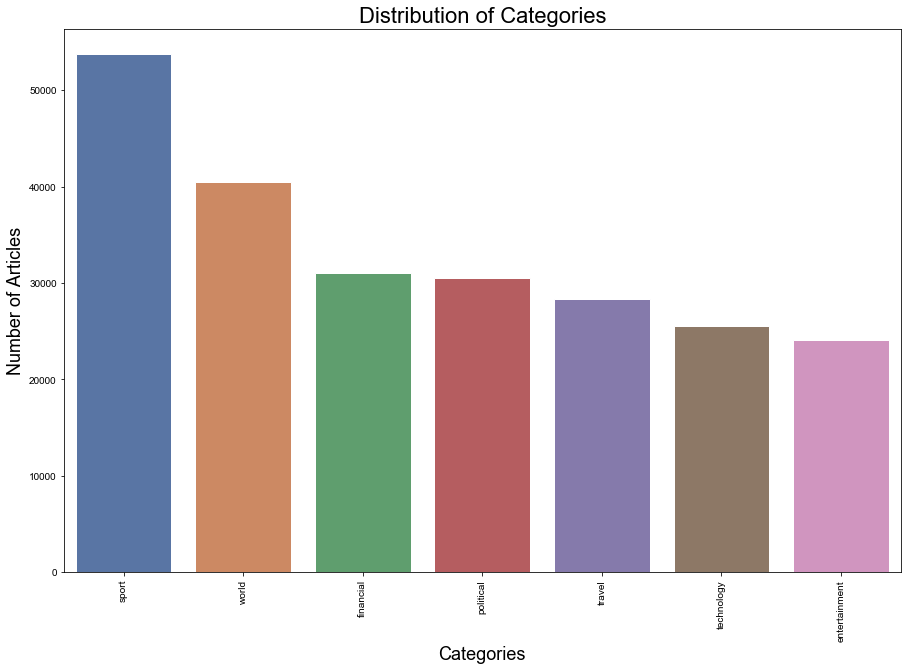

In [22]:
categories_count = df_all_news_processed['Category'].value_counts()
EDA.display_distribution(categories_count
                        ,"Distribution of Categories"
                        ,"Categories"
                        ,"Number of Articles")

In [ ]:
df_all_news_processed

In [9]:
''''''''''''''''''' ___MAIN PIPELINE___ '''''''''''''''''''

df_all_news = pd.read_pickle(r'data/original_data/pickles/all_news')

### Cleaning part
df_all_news['Text_TotalWords'] = EDA.count_words_per_records_opt_2(df_all_news)

df_all_news.reset_index(drop=True, inplace=True)

df_all_news_processed = df_all_news.copy()
#remove outliers - first phase
df_all_news_processed = df_all_news_processed[df_all_news_processed['Text_TotalWords'] > 10] 
df_all_news_processed = df_all_news_processed[df_all_news_processed['Text_TotalWords'] < 3000] 

df_all_news_processed = Cleaner.drop_duplicate_values(df_all_news_processed)
df_all_news_processed = Cleaner.remove_new_line(df_all_news_processed)
df_all_news_processed = Cleaner.remove_non_ascii_chars(df_all_news_processed)
df_all_news_processed = Cleaner.remove_multiple_spaces(df_all_news_processed)
df_all_news_processed = Cleaner.drop_null_values(df_all_news_processed)
df_all_news_processed = Cleaner.drop_duplicate_values(df_all_news_processed)

In [10]:
df_all_news_processed

,Title,Text,Category,Text_TotalWords
1,Tracy Morgan performs first stand-up show sinc...,Tracy Morgan performs first stand-up show sinc...,entertainment,380
3,President Barack Obama interviews author Maril...,FCC Information President Barack Obama intervi...,entertainment,333
4,"I will perform at night clubs, shows β€“ Pasto...",Source: Ghana | Hitz FM | Euphemia Akpalu Date...,entertainment,404
7,MEG Records' Country Star Tom MacLear will be ...,"MEG Records : In Latest Music News , Tom MacLe...",entertainment,326
8,Defeat the Zombie Apocalypse,Defeat the Zombie Apocalypse Zombie hunting in...,entertainment,36
...,...,...,...,...
493427,Bidenβ€™s Indecision Fuels Doubts He Could Sti...,Vice President Joe Biden s summer of uncertain...,world,749
493428,AFL grand final 2015: Hawthorn drop Billy Hart...,Return to video Video settings Please Log in t...,world,635
493429,Joaquin lashes Bahamas; Powerful hurricane cou...,"Photo: Tim Aylen, AP Image 1 of / 5 Caption Cl...",world,1226
493430,5 US service members among 12 dead in Afghan p...,5 US service members among 12 dead in Afghan p...,world,144


In [11]:
#N-grams function (done)
#buzzwords function (done)
#sentence encoder (too large texts to visaulise interactively)


df_all_news_processed['Text'] = NLP.to_lower_case(df_all_news_processed, 'Text')
df_all_news_processed = Cleaner.remove_most_noisy_words(df_all_news_processed, 'noisy_words.txt')
df_all_news_processed = Cleaner.remove_multiple_spaces(df_all_news_processed)

In [12]:
articles_split_by_word = NLP.tokenization(df_all_news_processed)
df_all_news_processed['Text'] = articles_split_by_word.apply(NLP.remove_stop_words)
df_all_news_processed['Text'] = df_all_news_processed['Text'].apply(NLP.rejoin_words) 
print("reached here")
df_all_news_processed = Cleaner.remove_punctuation(df_all_news_processed)
df_all_news_processed = Cleaner.remove_single_chars(df_all_news_processed)
df_all_news_processed = Cleaner.remove_multiple_spaces(df_all_news_processed)
#CHECKPOINT: Print N-grams

reached here


In [13]:
df_all_news_processed

,Title,Text,Category,Text_TotalWords
1,Tracy Morgan performs first stand-up show sinc...,tracy morgan performs first stand-up show sinc...,entertainment,380
3,President Barack Obama interviews author Maril...,fcc information president barack obama intervi...,entertainment,333
4,"I will perform at night clubs, shows β€“ Pasto...",source ghana hitz fm euphemia akpalu date 12-1...,entertainment,404
7,MEG Records' Country Star Tom MacLear will be ...,meg records latest music news tom maclear top ...,entertainment,326
8,Defeat the Zombie Apocalypse,defeat zombie apocalypse zombie hunting tukwil...,entertainment,36
...,...,...,...,...
493427,Bidenβ€™s Indecision Fuels Doubts He Could Sti...,vice president joe biden summer uncertainty tu...,world,749
493428,AFL grand final 2015: Hawthorn drop Billy Hart...,log update video settings video begin 5 secon...,world,635
493429,Joaquin lashes Bahamas; Powerful hurricane cou...,tim aylen ap image 1 5 caption close image 1 ...,world,1226
493430,5 US service members among 12 dead in Afghan p...,5 us service members among 12 dead afghan plan...,world,144


In [14]:
df_all_news_processed = Cleaner.remove_links(df_all_news_processed)
df_all_news_processed = Cleaner.remove_dates(df_all_news_processed)
df_all_news_processed = Cleaner.remove_years(df_all_news_processed)
df_all_news_processed = Cleaner.remove_months(df_all_news_processed)
df_all_news_processed = Cleaner.remove_days(df_all_news_processed)
df_all_news_processed = Cleaner.remove_time(df_all_news_processed)
df_all_news_processed = Cleaner.remove_multiple_spaces(df_all_news_processed)
#CHECKPOINT: Print N-grams

In [15]:
#lemmatize (if applicable)
#remove outliers
df_all_news['Text_TotalWords'] = EDA.count_words_per_records_opt_2(df_all_news_processed)
df_all_news_processed = df_all_news_processed[df_all_news_processed['Text_TotalWords'] > 10]
df_all_news_processed = df_all_news_processed[df_all_news_processed['Text_TotalWords'] < 600]

#N-grams function (done)
#buzzwords function (done)



In [17]:
t1 = time.time() 

articles_split_by_word = NLP.tokenization(df_all_news_processed)
df_all_news_processed['Text'] = NLP.stemming(articles_split_by_word)
df_all_news_processed['Text'] = df_all_news_processed['Text'].apply(NLP.rejoin_words) 

t2 = time.time() 
print("Process completed.\nTime taken:") 
print("{:.2f}".format(round(t2-t1, 2))+" seconds.")

#took 1446 seconds(approx 24 mins) on my pc 

Process completed.
Time taken:
1446.15 seconds.


In [18]:
df_all_news_processed

,Title,Text,Category,Text_TotalWords
1,Tracy Morgan performs first stand-up show sinc...,traci morgan perform first stand-up show sinc ...,entertainment,380
3,President Barack Obama interviews author Maril...,fcc inform presid barack obama interview autho...,entertainment,333
4,"I will perform at night clubs, shows β€“ Pasto...",sourc ghana hitz fm euphemia akpalu date time ...,entertainment,404
7,MEG Records' Country Star Tom MacLear will be ...,meg record latest music news tom maclear top 4...,entertainment,326
8,Defeat the Zombie Apocalypse,defeat zombi apocalyps zombi hunt tukwila. sto...,entertainment,36
...,...,...,...,...
493414,Sheriff in Oregon mass shooting probe opposes ...,dougla counti sheriff john hanlin address medi...,world,387
493418,6 US airmen among at least 11 dead in Afghan p...,updat 6 48 6 48 6 us airmen a g least 11 dead ...,world,278
493421,"Oregon college gunman kills seven, wounds 20",oregon colleg gunman kill seven wound 20 assoc...,world,300
493426,Vatican: Pope's visit with Davis not a form of...,updat 5 57 5 56 vatican pope visit davi form s...,world,505


In [24]:
#df_all_news_processed.to_pickle('data/original_data/pickles/df_all_news_processed_stemmed')

### Data Normalization & Feature Engineering  (normalize, tf-idf vectors)

In [27]:
t1 = time.time() 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7)
X = tfidfconverter.fit_transform(df_all_news_processed['Text']).toarray()

t2 = time.time() 
print("Process completed.\nTime taken:") 
print("{:.2f}".format(round(t2-t1, 2))+" seconds.")

Process completed.
Time taken:
47.70 seconds.


In [31]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.05239485, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.15335449, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
t1 = time.time() 

y = df_all_news_processed['Category']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

t2 = time.time() 
print("Process completed.\nTime taken:") 
print("{:.2f}".format(round(t2-t1, 2))+" seconds.")

Process completed.
Time taken:
6546.04 seconds.


In [47]:
y_pred = classifier.predict(X_test)


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

Error: Pip module debugpy is required for debugging cells. You will need to install it to debug cells.

### Model selection (SVM + kNN + naiveBayes + logistic regression on textual data?)

In [ ]:
pd.options.display.max_colwidth = 500
df_all_news_processed.loc[df_all_news_processed['Category'] == 'travel']

In [ ]:
'''######################## Find N-Grams ########################
from collections import Counter
from itertools import chain

#This function is called from find_most_common_n_grams()
def find_ngrams(input_list, n, n_common_words):
    return list(zip(*[input_list[i:] for i in range(n)]))


########### [Input] ###########
########## df: The DataFrame with the data that would like to process
########## n: The number of N-grams 
########## n_top_ngrams: The number the X most common N-grams
########## Returns: A list with the X most common N-grams and their occurrences 
def find_most_common_n_grams(df, n, n_top_ngrams):
    
    n_grams_title = str(n) +'_grams'
    
    df[n_grams_title] = df['Text'].map(lambda x: find_ngrams(x.split(" "), n, 10))
    
    ngrams = df[n_grams_title].tolist()
    ngrams = list(chain(*ngrams))

    #TODO this: should have x,y,z as the n increases 
    # e.g. [(x.lower(), y.lower(), z.lower()) for x,y,z in ngrams] #--> For 3-grams etc.
    #ngrams = [(x.lower(), y.lower()) for x,y in ngrams]

    ngram_counts = Counter(ngrams)
    return ngram_counts.most_common(n_top_ngrams)

#4 stands for: fourgrams. Change to any n value
#20 stands for: display the top 20 n-grams
testing = find_most_common_n_grams(df_all_news_processed, 4, 20)'''

In [ ]:
'''''''''''''''''''' -----NOT USED------''''''''''''''''''''''''''

#THIS CANNOT BE DONE BECAUSE WE DONT WANT TO REPLACE THE OUTLIERS WITH THE MEAN VALUE
#BECAUSE OF THE HIGH NUMBERS OF THE OUTLIERS, WE WANT TO REMOVE THEM COMPLETELY.
#PLUS THIS IS ABOUT NUMBER OF WORDS PER ARTICLE. WE CANT REPLACE ARTICLES WITH OTHER ARTICLES
#BECUASE THAT WOULD MESS UP OUR DATASET.
def remove_outliers_quantile_percentages(df, column_name, low_percent, high_percent):
    low_value = df[column_name].quantile(low_percent)
    high_value = df[column_name].quantile(high_percent)
    df[column_name] = np.where(df[column_name] <low_value, low_value,df[column_name])
    df[column_name] = np.where(df[column_name] >high_value, high_value,df[column_name])
    return df[column_name]
    
display_outliers_skewness_value(test, 'Text_TotalWords')
test['Text_TotalWords'] = remove_outliers_quantile_percentages(test, 'Text_TotalWords', 0.10, 0.90)
display_outliers_skewness_value(test, 'Text_TotalWords')
'''''''''''''''''''' -----NOT USED------''''''''''''''''''''''''''

In [ ]:
######## SERIAL CLEANING STEPS ######
Remove new line
Remove non-ascii chars
Remove multiple spaces
Remove null values
Remove duplicate values
Remove noisy pre-defined words (by list) / n-grams (to-do)
Remove punctuations
to lower(NLP)
Remove single chars
Remove links
Remove years
Remove months (to do)
Remove days
Remove time
Remove multiple spaces
Remove stopwords(NLP)

Remove outliers(EDA)